In [1]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

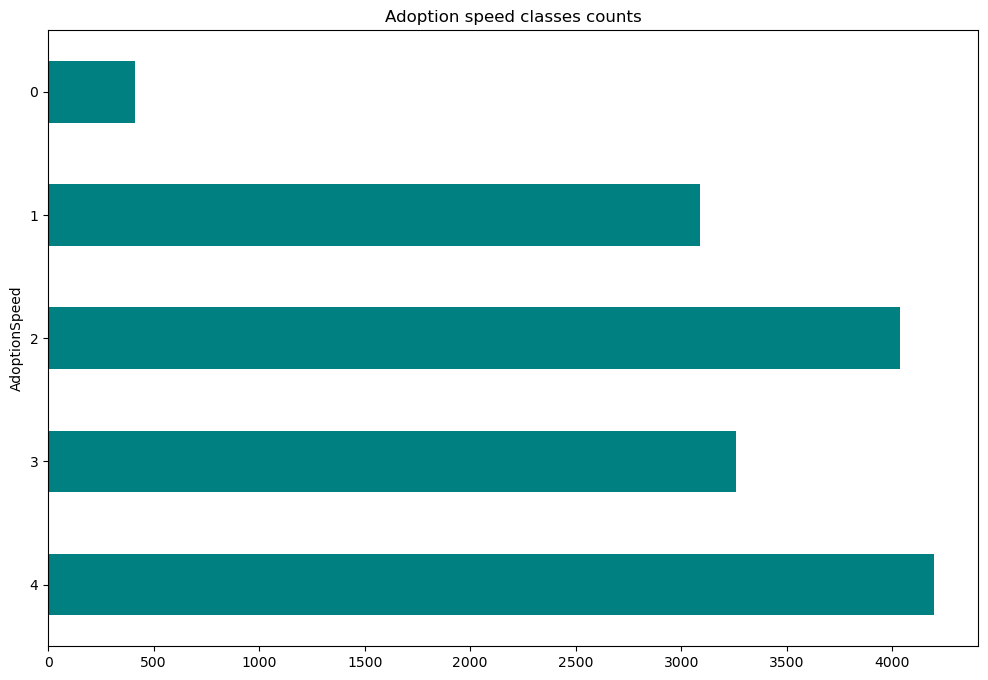

In [25]:
train= pd.read_csv("../petfinder-adoption-prediction/train/train.csv")
train['AdoptionSpeed'].value_counts().sort_index(ascending = False).plot(kind='barh', color='teal');
plt.title('Adoption speed classes counts');




In [26]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [27]:
print(train.columns)
print(train.shape)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')
(14993, 24)


In [28]:
# Quitamos duplicados
train.drop_duplicates(inplace=True) # inplace=True es equivalente a df_subset = df_subset.drop_duplicates()
train.shape

(14993, 24)

In [29]:
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [30]:
# cambiamos las columnas a numérico. las que no se pueden cambiar quedan strings
train = train.apply(pd.to_numeric, errors='ignore')

# Contamos las columnas numéricas y categóricas
num_cols = train.select_dtypes(include=['number']).shape[1]
cat_cols = train.select_dtypes(include=['object', 'category']).shape[1]

# Mostramos el resultado
print(f"📊 Columnas numéricas: {num_cols}")
print(f"🔤 Columnas categóricas: {cat_cols}")
print(f' En total son ', len(train.columns), 'columns')

📊 Columnas numéricas: 20
🔤 Columnas categóricas: 4
 En total son  24 columns


C:\Users\Gloria\AppData\Local\Temp\ipykernel_5888\1927118422.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  train = train.apply(pd.to_numeric, errors='ignore')


## Tareas a Realizar

#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar
* Chequear Variables Categóricas y convertirlas en Numéricas
* Estandarizar o Normalizar

#### Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target



In [31]:
train.Name.value_counts() # podemos visualizar que hay muchos que no tienen nombre y no aparecen nulos 
                            #porque les pusieron por nombre No Name 
                            # ver los que tienen mas de una columna


Name
Baby                      66
Lucky                     64
No Name                   54
Brownie                   54
Mimi                      52
                          ..
Maroo                      1
4 PUPPIES FOR ADOPTION     1
Trish                      1
Lab Mix Puppy 2            1
Fili                       1
Name: count, Length: 9059, dtype: int64

In [32]:
#Agrupamos por especie (perro=1, gato=2). Luego pedimos ver los casos nulos por categoria.
perros = train[train["Type"] == 1]
gatos = train[train["Type"] == 2]
print(perros.head(3), gatos.head(3))

   Type    Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
2     1  Brisco    1     307       0       1       2       7       0   
3     1    Miko    4     307       0       2       1       2       0   
4     1  Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
2  Their pregnant mother was dumped by her irresp...  3422e4

In [33]:
gatos_nulos = train[((train["Type"] == 2) & (train['Name'].isna()))|((train["Type"] == 2) & (train['Name']== 'No Name'))][['Type',"Name", "Age"]]
gatos_sin_nombre= gatos_nulos.size
print(f' hay ', gatos_sin_nombre, 'gatos sin nombre')
print(gatos_nulos.head())

 hay  1953 gatos sin nombre
    Type     Name  Age
5      2      NaN    3
8      2      NaN    2
19     2      NaN    1
26     2  No Name    2
27     2  No Name    1


In [34]:
perros_nulos = train[((train["Type"] == 1) & (train['Name'].isna()))|((train["Type"] == 1) & (train['Name']== 'No Name'))][['Type',"Name", "Age"]]
perros_sin_nombre= perros_nulos.size
print(f' hay ', perros_sin_nombre, 'perros sin nombre')
print(perros_nulos.head())

 hay  2004 perros sin nombre
     Type Name  Age
79      1  NaN    1
92      1  NaN    1
110     1  NaN    2
113     1  NaN  120
120     1  NaN    3


Se decide no imputar los nombres, después se puede visualizar si los que tienen nombre son adoptados antes o después. 

In [35]:
tabla_raza = pd.crosstab(train['Breed1'], train['Type'], margins=True, margins_name="Total")
print(tabla_raza)

Type       1     2  Total
Breed1                   
0          4     1      5
1          2     0      2
3          1     0      1
5          2     0      2
7          1     0      1
...      ...   ...    ...
304        0     7      7
305        0     8      8
306        0    56     56
307     5923     4   5927
Total   8132  6861  14993

[177 rows x 3 columns]


In [36]:
train.shape

(14993, 24)

In [40]:
train.groupby(['Type', 'Gender']).size()

Type  Gender
1     1         3005
      2         4252
      3          875
2     1         2531
      2         3025
      3         1305
dtype: int64

In [ ]:
cohen_kappa_score(y_test,y_pred, weights = 'quadratic')
from sklearn.metrics import cohen_kappa_score

notebookscohen_kappa_score(y_test,y_pred, weights = 'quadratic')
from sklearn.metrics import cohen_kappa_score